In [1]:
## Getting MNIST data 
import matplotlib.pyplot as plt
from six.moves import urllib
import seaborn as sns

from sklearn.decomposition import PCA
from scipy.io import loadmat

import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import model_selection as md
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import time

from sklearn.manifold import TSNE


# Sachs Harbour

In [2]:
# Load in the data csv and print it's shape
df_SH = pd.read_excel('Ambient Sound Data Sachs Harbour 2015-2016.xlsx')
df_SH = df_SH.drop(['Deployment','DateTime', 'Ice'], axis=1)
df_SH=df_SH.dropna(axis=0)

#df_SH.columns

In [3]:
# Set temperature as the target variable
var = ['Ice106km2']

# Drop temperature out of the weather data, and set it as X
X = df_SH.loc[:,df_SH.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = df_SH[var].copy()
print(Y.columns)

# Call the split data function
X_tr, X_va, Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.8, random_state=0)

# Print the shape of the split data
print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

# Normalize the data, as was done in Q2
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

Index(['Year', 'Month', 'Day', 'Hour', '10-100Hz', '100-1000Hz', '1-10kHz',
       '10-24kHz', '250Hz', '50-1000Hz', 'Temperature', 'DewPt', 'RelHum',
       'WindDir', 'WindSp', 'Pressure', 'Ice6km2', 'Ice19km2', 'Ice31km2'],
      dtype='object')
Index(['Ice106km2'], dtype='object')
training set ==  (1928, 19) (1928,) ,, validation set ==  (7714, 19) (7714,)


In [4]:
 ##Choose the percentage or the first components of PCA

#pca = PCA(.95)

n_components=0.95

pca=PCA(n_components=n_components, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
pca.fit(X_tr_Norm)
train_pca = pca.transform(X_tr_Norm)
test_pca = pca.transform(X_va_Norm)

Text(0.5, 1.0, 'PCA for Sachs Harbour Data: Training Data, Components 1 and 2')

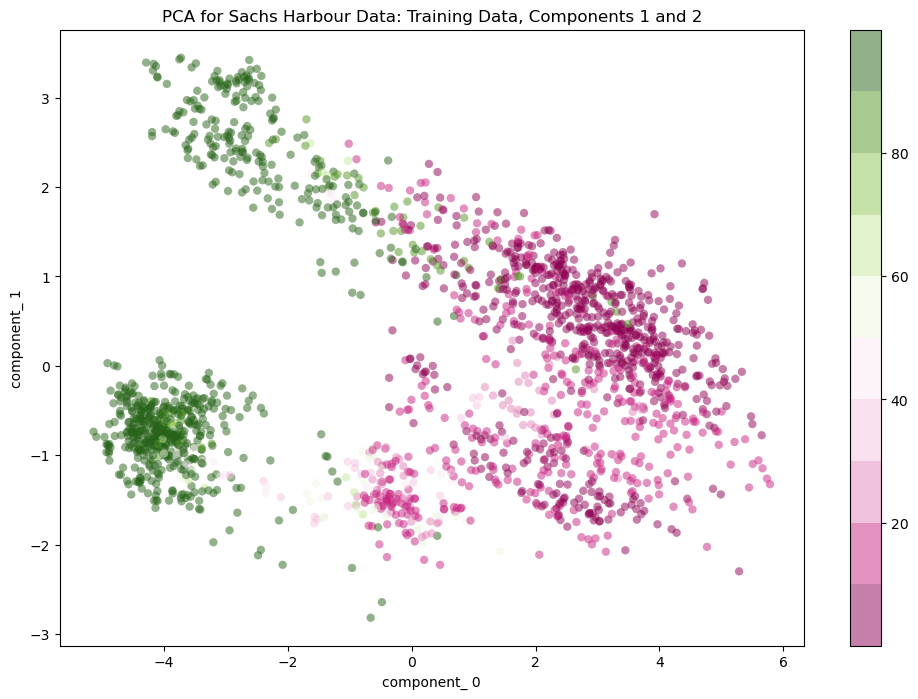

In [5]:
##  see the distribution of the examples on the some selected components
comX=0
comY=1

plt.figure(figsize=(12,8))
plt.scatter(train_pca[:,comX], train_pca[:,comY],
            c=Y_tr, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('PiYG',10))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();
plt.title('PCA for Sachs Harbour Data: Training Data, Components 1 and 2')

Text(0.5, 1.0, 'PCA for Sachs Harbour Data: Validation Data, Components 1 and 2')

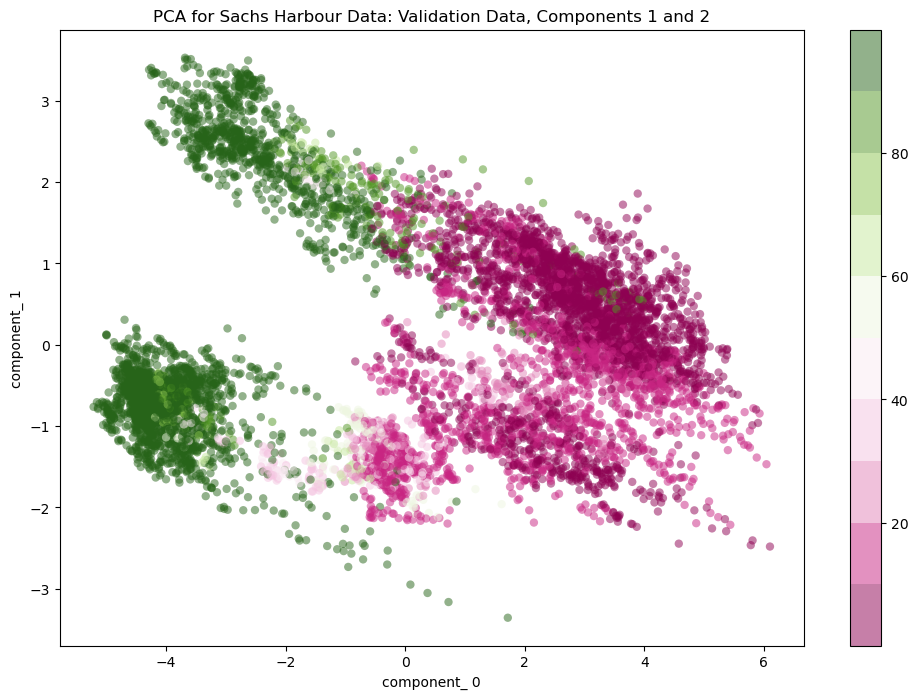

In [6]:
##  see the distribution of the examples on the some selected components
comX=0
comY=1

plt.figure(figsize=(12,8))
plt.scatter(test_pca[:,comX], test_pca[:,comY],
            c=Y_va, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('PiYG',10))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();
plt.title('PCA for Sachs Harbour Data: Validation Data, Components 1 and 2')

In [7]:
## Run t_SNE (with  dimensions=2 i.e., a new 2-d space) 

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=800)#, verbose=1, perplexity=40, n_iter=300)
tsne.fit(X_tr_Norm)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1928 samples in 0.001s...
[t-SNE] Computed neighbors for 1928 samples in 0.210s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1928
[t-SNE] Computed conditional probabilities for sample 1928 / 1928
[t-SNE] Mean sigma: 1.257062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.443604
[t-SNE] KL divergence after 800 iterations: 0.800171
t-SNE done! Time elapsed: 14.168137788772583 seconds


In [8]:
tsne_results_tr= tsne.fit_transform(X_tr_Norm)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1928 samples in 0.002s...


C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 1928 samples in 0.244s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1928
[t-SNE] Computed conditional probabilities for sample 1928 / 1928
[t-SNE] Mean sigma: 1.257062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.441841
[t-SNE] KL divergence after 800 iterations: 0.798531


Text(0.5, 1.0, 't-SNE for Sachs Harbour Data: Training Data, Components 1 and 2')

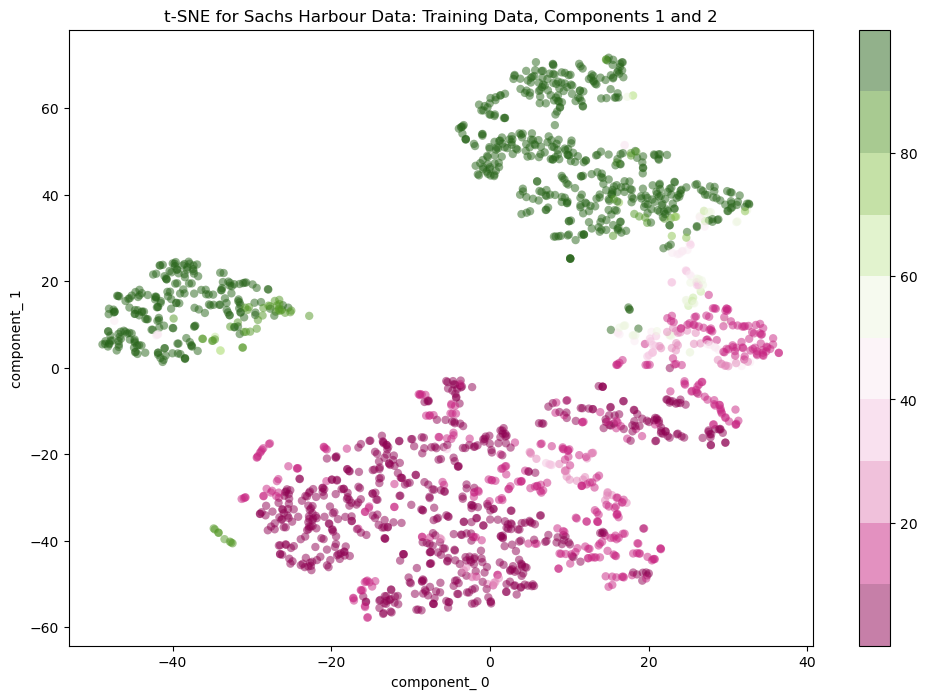

In [9]:
## see the examples on the selected 2-dim space 

comX=0
comY=1

plt.figure(figsize=(12,8))
plt.scatter(tsne_results_tr[:,comX], tsne_results_tr[:,comY],
            c=Y_tr, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('PiYG',10))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();
plt.title('t-SNE for Sachs Harbour Data: Training Data, Components 1 and 2')

# Forest Cover

In [10]:
df = pd.read_csv('covtype.csv')
# "class" column as numpy array.
y = df["Cover_Type"].values
print(type(y))

# All data except "class" column.
x = df.drop(["Cover_Type"], axis=1).values
print(x.shape)

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr_forest, X_va_forest, Y_tr_forest, Y_va_forest = train_test_split(x,tar,test_size=0.5, random_state=0)

# Print the shape of the split data
print('training set == ',np.shape(X_tr_forest),np.shape(Y_tr_forest),',, validation set == ', np.shape(X_va_forest),np.shape(Y_va_forest))

# Normalize the data, as was done in Q2
scaler_S= StandardScaler().fit(X_tr_forest)  # line #2
X_tr_Norm= scaler_S.transform(X_tr_forest) # line # 3
X_va_Norm= scaler_S.transform(X_va_forest)  # Line #4

<class 'numpy.ndarray'>
(581012, 54)
training set ==  (290506, 54) (290506, 7) ,, validation set ==  (290506, 54) (290506, 7)


In [11]:
n_components=2

pca=PCA(n_components=n_components, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
pca.fit(X_tr_Norm)
train_pca_forest = pca.transform(X_tr_Norm)
test_pca_forest = pca.transform(X_va_Norm)

print(len(train_pca_forest))
print(len(test_pca_forest))
print(len(Y_va_forest))
print(Y_va_forest.shape)

290506
290506
290506
(290506, 7)


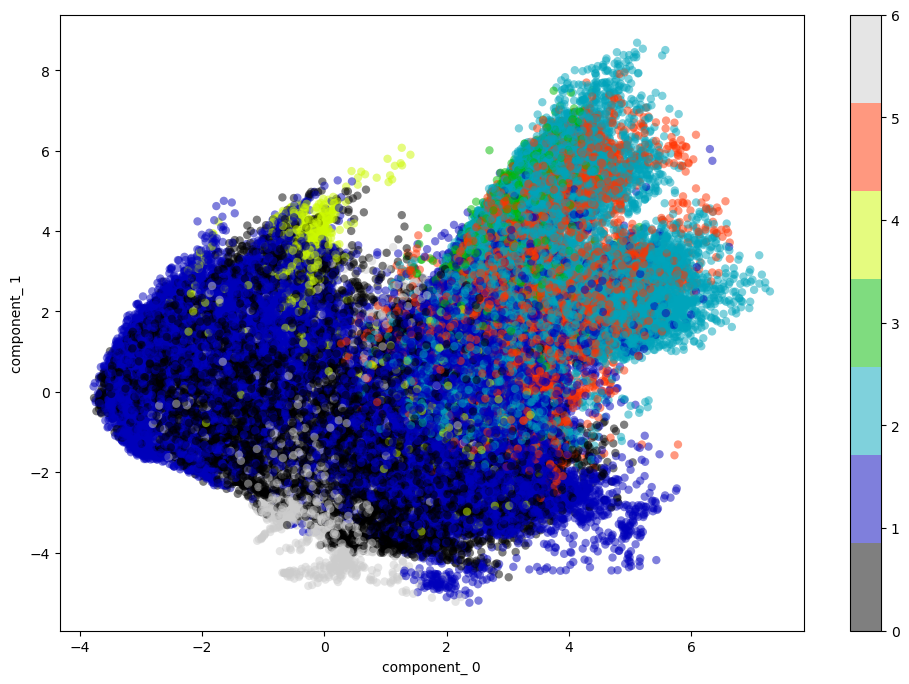

In [12]:
comX=0
comY=1

Y_va_flat = Y_va_forest.argmax(axis=1)

plt.figure(figsize=(12,8))
plt.scatter(test_pca_forest[:,comX], test_pca_forest[:,comY],
            c=Y_va_flat, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral',7))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();

In [13]:
## Run t_SNE (with  dimensions=2 i.e., a new 2-d space) 

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)#, verbose=1, perplexity=40, n_iter=300)
tsne.fit(X_tr_Norm)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 290506 samples in 0.046s...
[t-SNE] Computed neighbors for 290506 samples in 2468.416s...
[t-SNE] Computed conditional probabilities for sample 1000 / 290506
[t-SNE] Computed conditional probabilities for sample 2000 / 290506
[t-SNE] Computed conditional probabilities for sample 3000 / 290506
[t-SNE] Computed conditional probabilities for sample 4000 / 290506
[t-SNE] Computed conditional probabilities for sample 5000 / 290506
[t-SNE] Computed conditional probabilities for sample 6000 / 290506
[t-SNE] Computed conditional probabilities for sample 7000 / 290506
[t-SNE] Computed conditional probabilities for sample 8000 / 290506
[t-SNE] Computed conditional probabilities for sample 9000 / 290506
[t-SNE] Computed conditional probabilities for sample 10000 / 290506
[t-SNE] Computed conditional probabilities for sample 11000 / 290506
[t-SNE] Computed conditional probabilities for sample 12000 / 290506
[t-SNE] Computed conditional prob

In [14]:
tsne_results_tr= tsne.fit_transform(X_tr_Norm)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 290506 samples in 0.032s...


C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 290506 samples in 2483.866s...
[t-SNE] Computed conditional probabilities for sample 1000 / 290506
[t-SNE] Computed conditional probabilities for sample 2000 / 290506
[t-SNE] Computed conditional probabilities for sample 3000 / 290506
[t-SNE] Computed conditional probabilities for sample 4000 / 290506
[t-SNE] Computed conditional probabilities for sample 5000 / 290506
[t-SNE] Computed conditional probabilities for sample 6000 / 290506
[t-SNE] Computed conditional probabilities for sample 7000 / 290506
[t-SNE] Computed conditional probabilities for sample 8000 / 290506
[t-SNE] Computed conditional probabilities for sample 9000 / 290506
[t-SNE] Computed conditional probabilities for sample 10000 / 290506
[t-SNE] Computed conditional probabilities for sample 11000 / 290506
[t-SNE] Computed conditional probabilities for sample 12000 / 290506
[t-SNE] Computed conditional probabilities for sample 13000 / 290506
[t-SNE] Computed conditional probabilities for sam

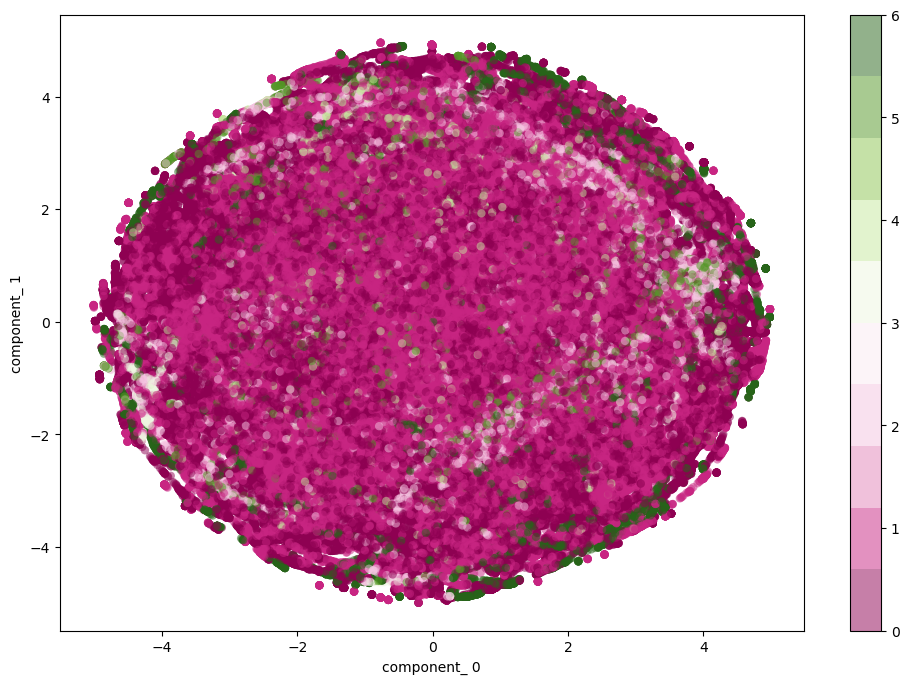

In [16]:
## see the examples on the selected 2-dim space 

Y_tr_flat = Y_tr_forest.argmax(axis=1)

comX=0
comY=1

plt.figure(figsize=(12,8))
plt.scatter(tsne_results_tr[:,comX], tsne_results_tr[:,comY],
            c=Y_tr_flat, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('PiYG',10))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();